# MATH Assignment 4

### (a) This question is revealed in the written work, namely the PDF file.

### (b) Slover

# V(x,s)

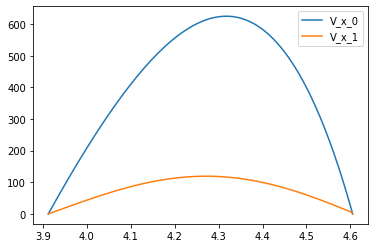

In [22]:
# V(x,s)
import pandas as pd 
import numpy as np 

left = np.log(50)
right = np.log(100)
dx = 1/100
#N = (right - left)/dx

T = 1
k = 1/4
dt = k * dx * dx
M = int(T/dt)

x = np.arange(left, right, dx)
x = np.append(x, right)
N = len(x)

r = 0.05 
sigma = 0.4
a = r - sigma * sigma/2
b = sigma * sigma/2
c = -1*r

wv = np.zeros((M ) * (N )).reshape(M , N )
wv[0,:] = (np.exp(x) - 50)*(100 - np.exp(x))
for m in range(M-1):
    t = m * dt
    wv[m, 0] = 0 # Left  Boundary
    wv[m, N-1] = 0 # Right Boundary
    for n in range(1,N-1):
        delta1 = a/2 * (dt/dx) * (wv[m,n+1]-wv[m,n-1])
        delta2 = b * (dt/dx/dx) * (wv[m,n+1]-2*wv[m,n]+wv[m,n-1])
        delta3 = c * dt * wv[m,n]
        delta = delta1 + delta2 + delta3 
        wv[m+1,n] = wv[m,n] + delta

# P(S,t)

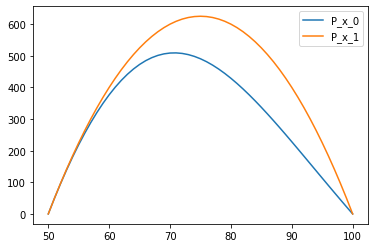

In [20]:
# P(S,t)
import numpy as np 

left = 50
right = 100
dx = 1
#N = (right - left)/dx

T = 1
dt = 2 * 0.01 * 0.01
M = int(T/dt)

x = np.arange(left, right, dx)
x = np.append(x, right)
N = len(x)

r = 0.05 
sigma = 0.4
a = r - sigma * sigma/2
b = sigma * sigma/2
c = -1*r

wp = np.zeros((M ) * (N )).reshape(M , N )
#w.shape
#w(0,:)
wp[M-1,:] = (x - 50)*(100 - x)
for m in range(M-1,0,-1):
    t = m * dt
    wp[m, 0] = 0 # Left  Boundary
    wp[m, N-1] = 0 # Right Boundary
    for n in range(1,N-1):
        delta1 = r*n/2 * (dt/dx) * (wp[m,n+1]-wp[m,n-1])
        delta2 = b * n * n * (dt/dx/dx) * (wp[m,n+1]-2*wp[m,n]+wp[m,n-1])
        delta3 = c * dt * wp[m,n]
        delta = delta1 + delta2 + delta3 
        delta0 = wp[m,n]
        # w[m-1,n] = w[m,n] + delta
        wp[m-1,n] = delta0 + delta

### (c) Solution 

Include the graphs of $V(x,0), V(x,1), P(S,1), P(S,0)$

In [ ]:
# V(·, ·)
import matplotlib.pyplot as plt 
V_x_0 = wv[0,:]
V_x_1 = wv[M-1,:]
plt.plot(x, V_x_0)
plt.plot(x, V_x_1)  
plt.legend(['V_x_0','V_x_1'])

In [ ]:
# P(·, ·)
import matplotlib.pyplot as plt 
P_S_0 = wp[0,:]
P_S_1 = wp[M-1,:]
plt.plot(x, P_S_0)
plt.plot(x, P_S_1)  
plt.legend(['P_x_0','P_x_1'])

* Where does the value (in S coordinates) reaches its maximum?

It is reached when

(a) x = 4.32202 for V(x, 0) and P(S, T), where $S = e^x = 75$

(b) x = 4.27202 for V(x, 1) and P(S, 0), where $S = e^x = 72$

* Why do you think the maximum value of P(S, 0) is reached at a different value of S?

It is because the time value of the option changes, as when it is closer to mature date, the time value goes down.

### (d) *Stability* vary k. Find the max k. Does this bound on k depend on dx?

#### Set up the funtion

In [33]:
def V(k,dx):
    left = np.log(50)
    right = np.log(100)
    T = 1
    dt = k * dx * dx
    M = int(T/dt)
    x = np.arange(left, right, dx)
    x = np.append(x, right)
    N = len(x)
    r = 0.05 
    sigma = 0.4
    a = r - sigma * sigma/2
    b = sigma * sigma/2
    c = -1*r
    w = np.zeros((M ) * (N )).reshape(M , N )
    w[0,:] = (np.exp(x) - 50)*(100 - np.exp(x))
    for m in range(M-1):
        t = m * dt
        w[m, 0] = 0 # Left  Boundary
        w[m, N-1] = 0 # Right Boundary
        for n in range(1,N-1):
            delta1 = a/2 * (dt/dx) * (w[m,n+1]-w[m,n-1])
            delta2 = b * (dt/dx/dx) * (w[m,n+1]-2*w[m,n]+w[m,n-1])
            delta3 = c * dt * w[m,n]
            delta = delta1 + delta2 + delta3 
            w[m+1,n] = w[m,n] + delta 
    V_x_0 = w[0,:]
    V_x_half = w[(M-1)//2,:]
    V_x_1 = w[M-1,:]
    plt.plot(x, V_x_0)
    plt.plot(x, V_x_half)
    plt.plot(x, V_x_1)  
    plt.legend(['V_x_0','V_x_half','V_x_1'])     

#### When k =6, the solution is still stable

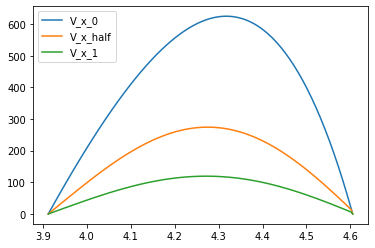

In [35]:
V(k = 6, dx = 1/100)

#### When k = 7, the solution have become unstable

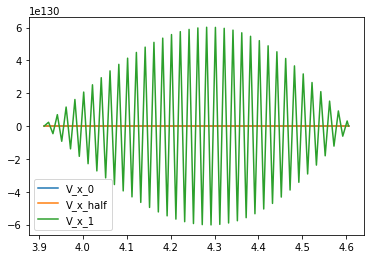

In [34]:
V(k =7, dx =1/100)

To sum up, the max k is 6.

The bound on k is NOT associated with dx, as you can see below, when k=7, whenever dx becomes bigger or smaller, the solution keeps unstable. 

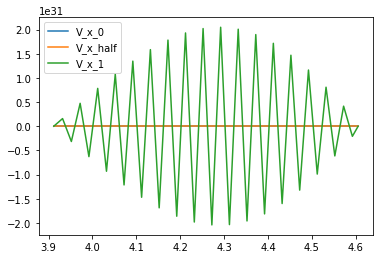

In [43]:
V(k =7, dx = 1/50)

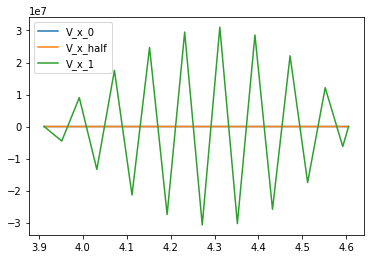

In [44]:
V(k = 7, dx = 1/25)

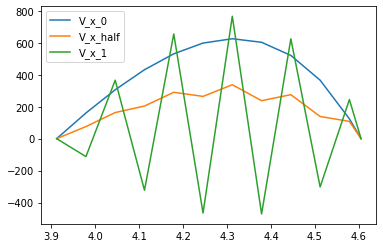

In [46]:
V(k = 7, dx = 1/15)

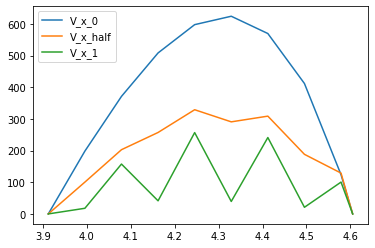

In [47]:
V(k = 7, dx = 1/12)

#### When k=6, as dx becomes smaller, the solution keeps stable. 

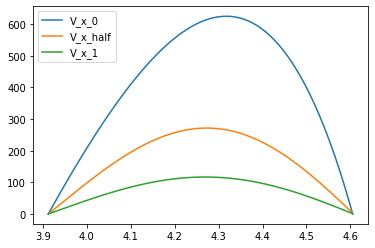

In [51]:
V(k = 6, dx = 1/200)

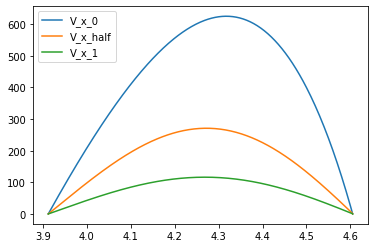

In [52]:
V(k = 6, dx = 1/500)

#### When k=7, as dx becomes smaller, the solution keeps unstable. 

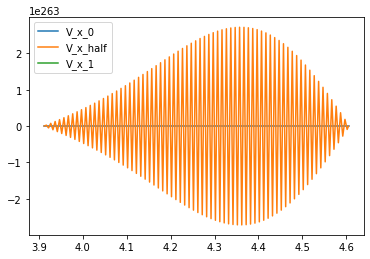

In [56]:
V(k = 7, dx = 1/200)

#### When k=6, as dx becomes larger, the solution keeps stable. 

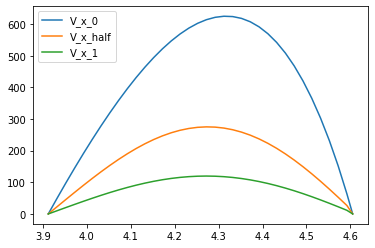

In [53]:
V(k = 6, dx = 1/50)

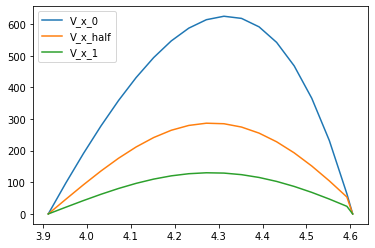

In [54]:
V(k = 6, dx = 1/25)

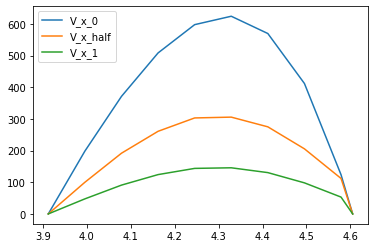

In [55]:
V(k = 6, dx = 1/12)

To Sum up, the bound on k is NOT associated with dx

### (e) Order of convergence: Vary dx, keeping k = 1/4 constant.

Estimate the order of convergence of the approximation method to the true solution. 

The order of the convergence is 2.

In this problom

> Yes, you can use the approximate solution at t = 0, calculated by using a large number of points, as the "true" solution when estimating the order of convergence. ---- Johan WALDEN


First, we set up the function.

In [59]:
def V(dx):
    left = np.log(50)
    right = np.log(100)
    T = 1
    k = 1/4
    dt = k * dx * dx
    M = int(T/dt)
    x = np.arange(left, right, dx)
    x = np.append(x, right)
    N = len(x)
    r = 0.05 
    sigma = 0.4
    a = r - sigma * sigma/2
    b = sigma * sigma/2
    c = -1*r
    w = np.zeros((M ) * (N )).reshape(M , N )
    w[0,:] = (np.exp(x) - 50)*(100 - np.exp(x))
    for m in range(M-1):
        t = m * dt
        w[m, 0] = 0 # Left  Boundary
        w[m, N-1] = 0 # Right Boundary
        for n in range(1,N-1):
            delta1 = a/2 * (dt/dx) * (w[m,n+1]-w[m,n-1])
            delta2 = b * (dt/dx/dx) * (w[m,n+1]-2*w[m,n]+w[m,n-1])
            delta3 = c * dt * w[m,n]
            delta = delta1 + delta2 + delta3 
            w[m+1,n] = w[m,n] + delta 
    V_x_0 = w[0,:]
    V_x_half = w[(M-1)//2,:]
    V_x_1 = w[M-1,:]
    plt.plot(x, V_x_0)
    plt.plot(x, V_x_half)
    plt.plot(x, V_x_1)  
    plt.legend(['V_x_0','V_x_half','V_x_1'])     

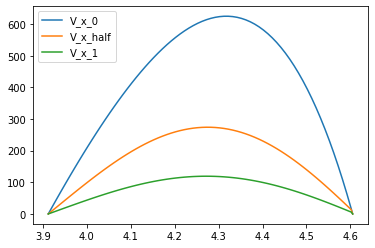

In [60]:
V(dx = 1/100)

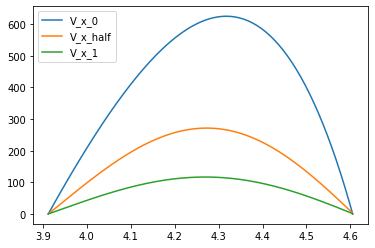

In [62]:
V(dx = 1/200)

Now, we caculate the order of convergence.

In [65]:
def Value(dx):
    left = np.log(50)
    right = np.log(100)
    T = 1
    k = 1/4
    dt = k * dx * dx
    M = int(T/dt)
    x = np.arange(left, right, dx)
    x = np.append(x, right)
    N = len(x)
    r = 0.05 
    sigma = 0.4
    a = r - sigma * sigma/2
    b = sigma * sigma/2
    c = -1*r
    w = np.zeros((M ) * (N )).reshape(M , N )
    w[0,:] = (np.exp(x) - 50)*(100 - np.exp(x))
    for m in range(M-1):
        t = m * dt
        w[m, 0] = 0 # Left  Boundary
        w[m, N-1] = 0 # Right Boundary
        for n in range(1,N-1):
            delta1 = a/2 * (dt/dx) * (w[m,n+1]-w[m,n-1])
            delta2 = b * (dt/dx/dx) * (w[m,n+1]-2*w[m,n]+w[m,n-1])
            delta3 = c * dt * w[m,n]
            delta = delta1 + delta2 + delta3 
            w[m+1,n] = w[m,n] + delta 
    V_x_0 = w[0,:]
    return V_x_0

In [70]:
u = Value(dx = 1/500)

In [72]:
w100 = Value(dx = 1/100)

#### Using the sup norm I get a line of log(N) vs Log(e). The slope is 0.5 depending on how large of an N I compute the errors for. And we can say that the order of convergence is 2.